In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("heart.csv")
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
data.drop_duplicates(keep='first', inplace=True)

In [6]:
# checking missing values
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
categorical_val=[]
continous_val=[]
for column in data.columns:
    if len(data[column].unique()) <=10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [9]:
continous_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [10]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]
pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [12]:
for x in categorical_val:
    print (data[x].value_counts())

1    206
0     96
Name: sex, dtype: int64
0    143
2     86
1     50
3     23
Name: cp, dtype: int64
0    257
1     45
Name: fbs, dtype: int64
1    151
0    147
2      4
Name: restecg, dtype: int64
0    203
1     99
Name: exng, dtype: int64
2    141
1    140
0     21
Name: slp, dtype: int64
0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64
2    165
3    117
1     18
0      2
Name: thall, dtype: int64
1    164
0    138
Name: output, dtype: int64


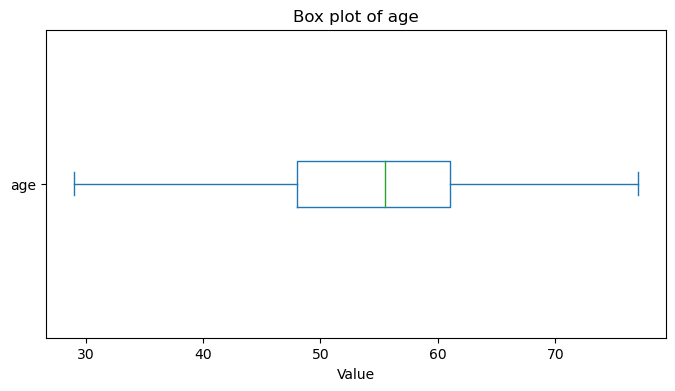

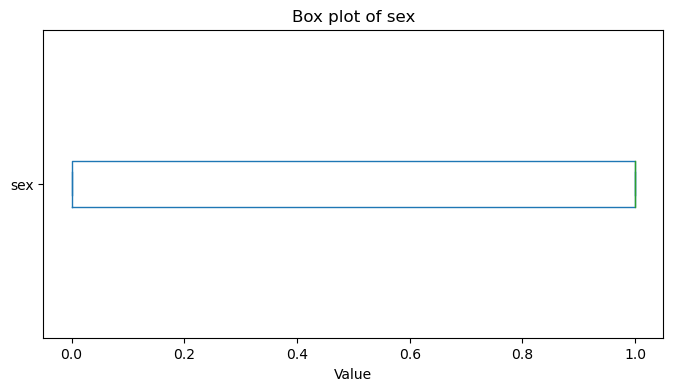

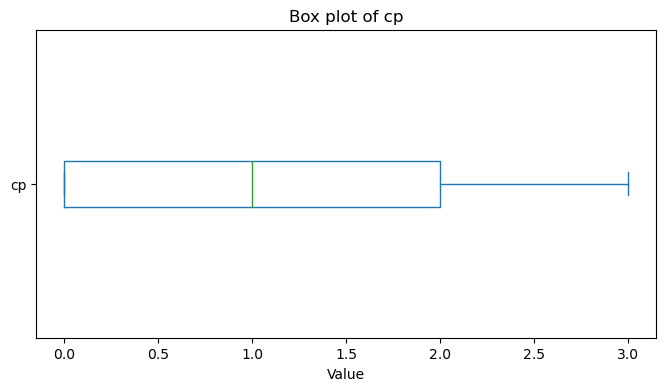

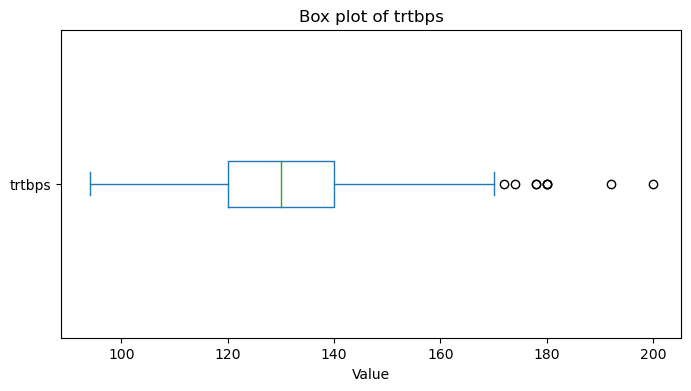

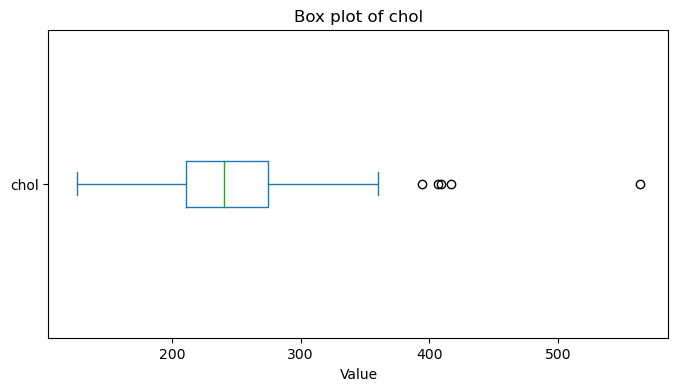

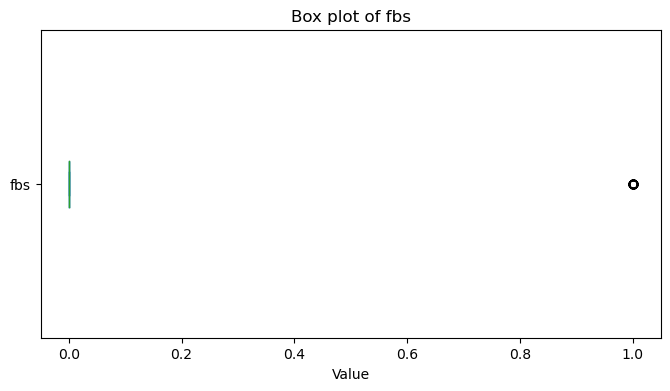

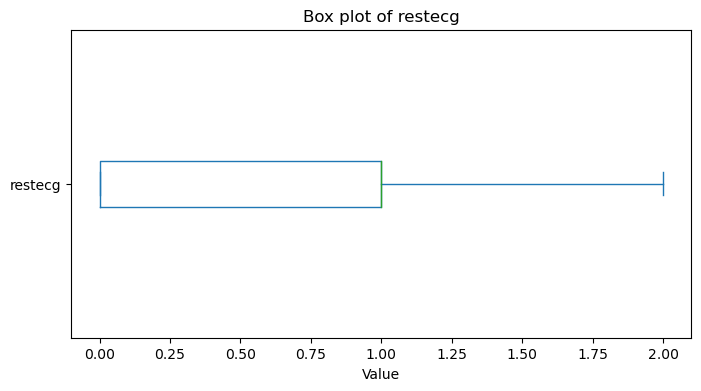

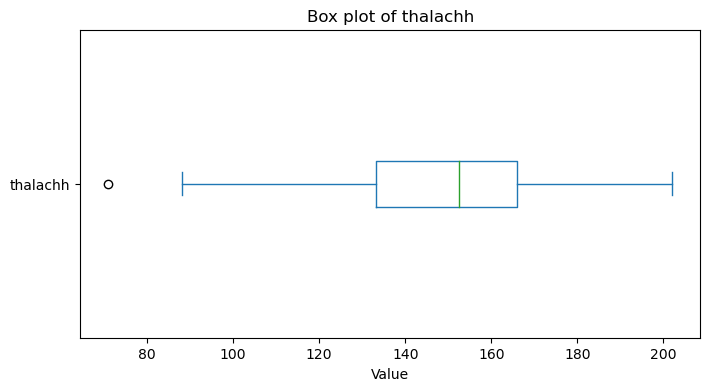

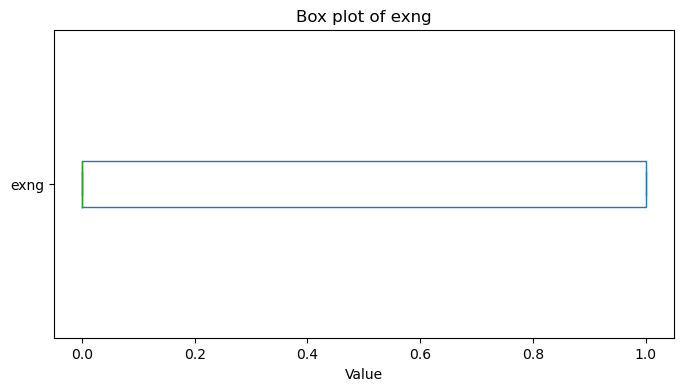

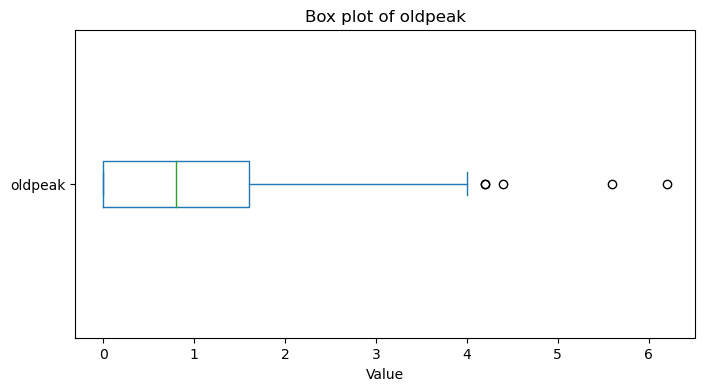

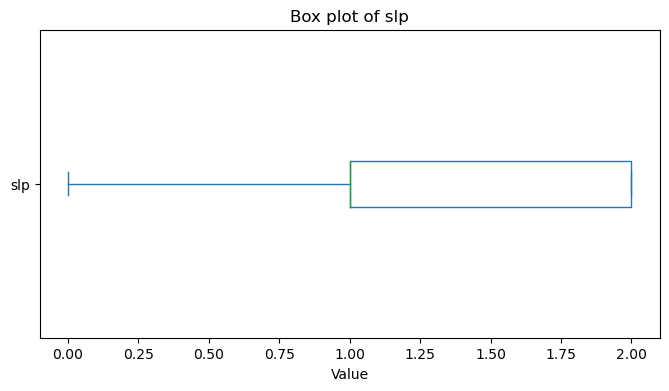

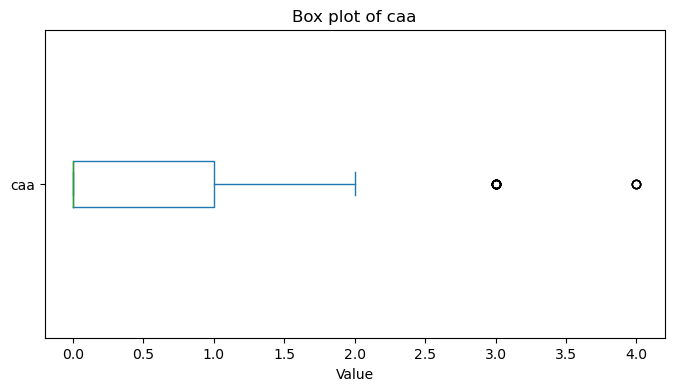

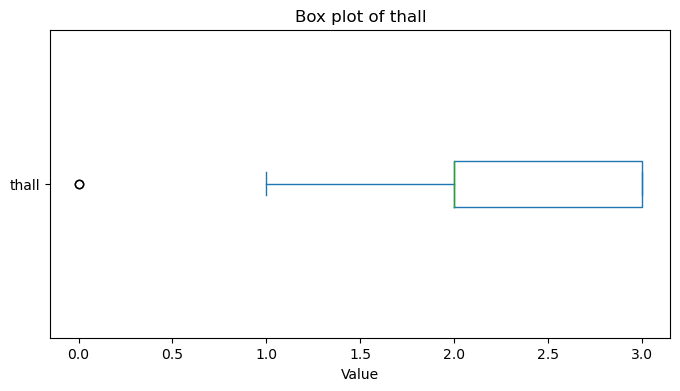

In [13]:
# to check if there is any outlier
# Select the columns you want to plot
columns_to_plot = ['age', 'sex', 'cp', 'trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']
# Create a box plot for the selected columns
for column in columns_to_plot:
    data[[column]].plot(kind='box', vert=False, figsize=(8,4))
    plt.title('Box plot of ' + column)
    plt.xlabel('Value')
    plt.show()

In [14]:
#remove outlier using IQR
def removeOutlier(col):
    sorted(col)
    quant1,quant2=col.quantile([0.25,0.75])
    IQR=quant2-quant1
    lowerRange=quant1-(1.5*IQR)
    upperRange=quant2+(1.5*IQR)
    return lowerRange,upperRange

In [15]:
columns_to_remove=['trtbps','chol','fbs','oldpeak','caa','thall']
# Create a box plot for the selected columns
for column in columns_to_remove:
    lowscore,highscore=removeOutlier(data[column])
    data[column]=np.where(data[column]> highscore, highscore,data[column])
    data[column]=np.where(data[column]< lowscore,lowscore, data[column])

<function matplotlib.pyplot.show(close=None, block=None)>

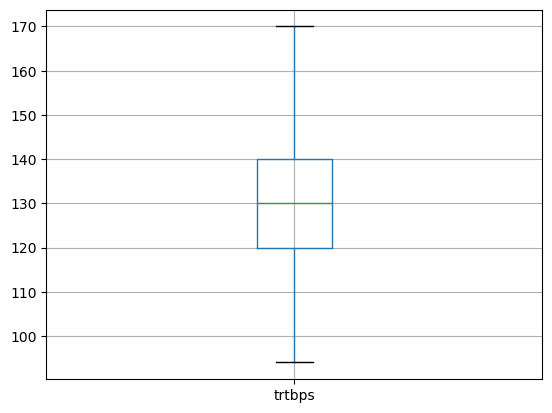

In [16]:
# ti check if the outlier is removed
data.boxplot(column=["trtbps"])
plt.show